In [4]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [5]:
IMAGE_SIZE=256
BATCH_SIZE=32
RGB_CHANNEL=3
EPOCHS=50

In [6]:
data_set=tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Users\ADMIN\Desktop\ML and DL\Data Set Potato\data',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE

)

Found 2152 files belonging to 3 classes.


In [7]:
class_names_=data_set.class_names
class_names_

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

# No.of Images Per batch(32)

In [8]:
len(data_set)

68

In [9]:
68*32

2176

In [10]:
# The Last Batch is imbalanced

In [11]:
for image_batch,label_batch in data_set.take(1):#it take the 1st batch
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 1 0 1 0 1 1 0 1 0 1 0 1 2 1 0 0 0 1 0 0 1 2 1 0 2 1 0 1 1 2]


In [12]:
(32, 256, 256, 3)#(Batch,Image_size,Image_size,RGB Channel)

(32, 256, 256, 3)

In [13]:
# [0 0 0 1 0 0 1 1 1 2 0 1 0 0 1 1 1 0 2 1 2 2 1 2 0 0 0 0 1 1 1 0]
print("{0},    {1},    {2}".format(class_names_[0],class_names_[1],class_names_[2]))

Potato___Early_blight,    Potato___Late_blight,    Potato___healthy


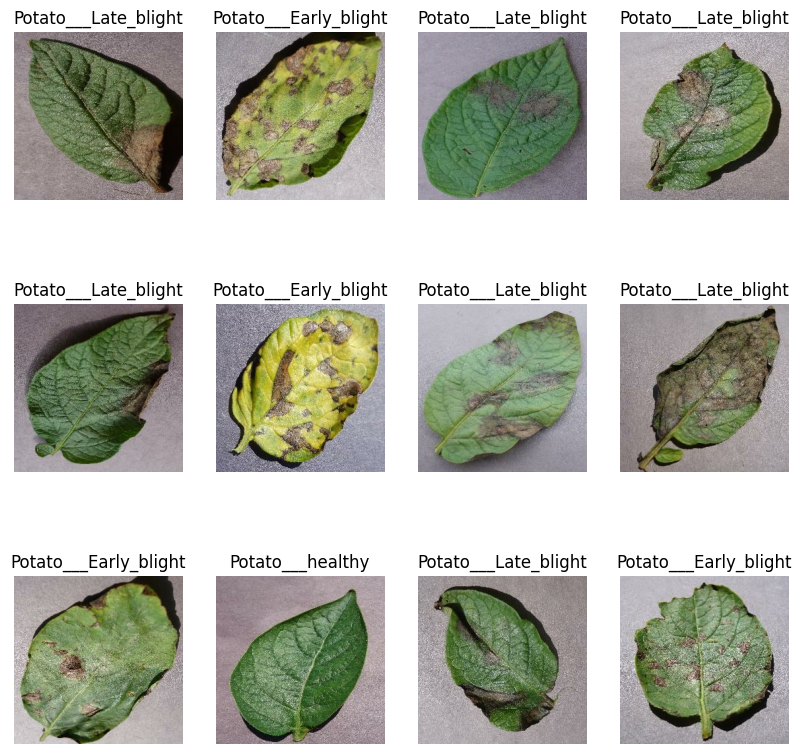

In [14]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in data_set.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.title(f'{class_names_[label_batch[i]]}')
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.axis('off')
    # print(image_batch[0].numpy())

# Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
len(data_set)

68

In [17]:
print("80 percent for Training\n20 percent for testing in that:\n\t 10 percent for validation\n\t 10 percent for testing")

80 percent for Training
20 percent for testing in that:
	 10 percent for validation
	 10 percent for testing


In [18]:
len(data_set)*0.8# training size

54.400000000000006

In [19]:
train_dataset=data_set.take(54)

In [20]:
test_dataset=data_set.skip(54)

In [21]:
len(data_set)*0.1

6.800000000000001

In [22]:
validaion=test_dataset.take(6)
len(validaion)

6

In [23]:
test_dataset=test_dataset.skip(6)

In [24]:
len(test_dataset)

8

In [25]:
def get_dataset_partitions_tf(ds,train_split=0.8,valid_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)

    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(valid_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [26]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(data_set)

In [27]:
len(train_ds)

54

In [28]:
len(val_ds)

6

In [29]:
len(test_ds)

8

In [30]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Preprocessing

In [31]:
resize_rescale=tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255),

])

In [32]:
data_augmentation=tf.keras.Sequential([
    layers.RandomFlip('horizontal_ad_vertical'),
    layers.RandomRotation(0.1)
])

# MODEL

In [33]:
from tensorflow.keras import models

In [ ]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,RGB_CHANNEL)
n_classes=3

In [ ]:
model=models.Sequential([
    resize_rescale,
    data_augmentation,
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    #Dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(3,activation='softmax')#3 layers because 3 classes
])
model.build(input_shape=input_shape)

c:\Users\ADMIN\Desktop\ML and DL\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.fit(
    train_ds,
    epochs=50,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 26s 437ms/step - accuracy: 0.4784 - loss: 0.9198
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 23s 419ms/step - accuracy: 0.6402 - loss: 0.7202
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 22s 414ms/step - accuracy: 0.7734 - loss: 0.5099
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 22s 416ms/step - accuracy: 0.8501 - loss: 0.3687
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 22s 415ms/step - accuracy: 0.8787 - loss: 0.2946
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 22s 410ms/step - accuracy: 0.9298 - loss: 0.1843
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 22s 409ms/step - accuracy: 0.9179 - loss: 0.1972
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 22s 416ms/step - accuracy: 0.9459 - loss: 0.1280
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 23s 430ms/step - accuracy: 0.9631 - loss: 0.1032
Epoch 10/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 447ms/step - accuracy: 0.9682 - loss: 0.0927


In [39]:
score=model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.9654 - loss: 0.1650


In [40]:
score

[0.1841498166322708, 0.9609375]

In [41]:
import numpy as np

Actual_label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
Predicted: Potato___Late_blight


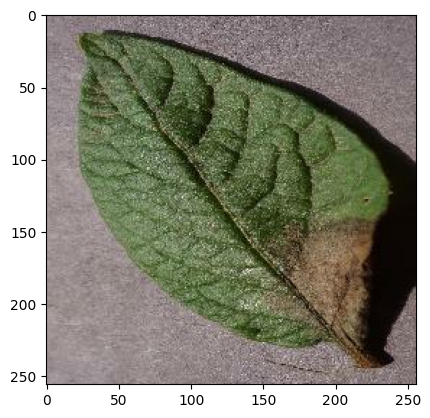

In [42]:
for iamges_batch,labels_batch in test_ds.take(1):
    print(f"Actual_label: {class_names_[label_batch[0].numpy().astype('uint8')]}")

    batch_pred=model.predict(image_batch)
    batch_pred=np.argmax(batch_pred[0])
    print(f"Predicted: {class_names_[batch_pred]}")
    plt.imshow(image_batch[0].numpy().astype('uint8'))
# model.predict()

In [43]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(img)
    img_array=tf.expand_dims(img_array,0)
    predictions=model.predict(img_array)
    prediction_class=class_names_[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return prediction_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


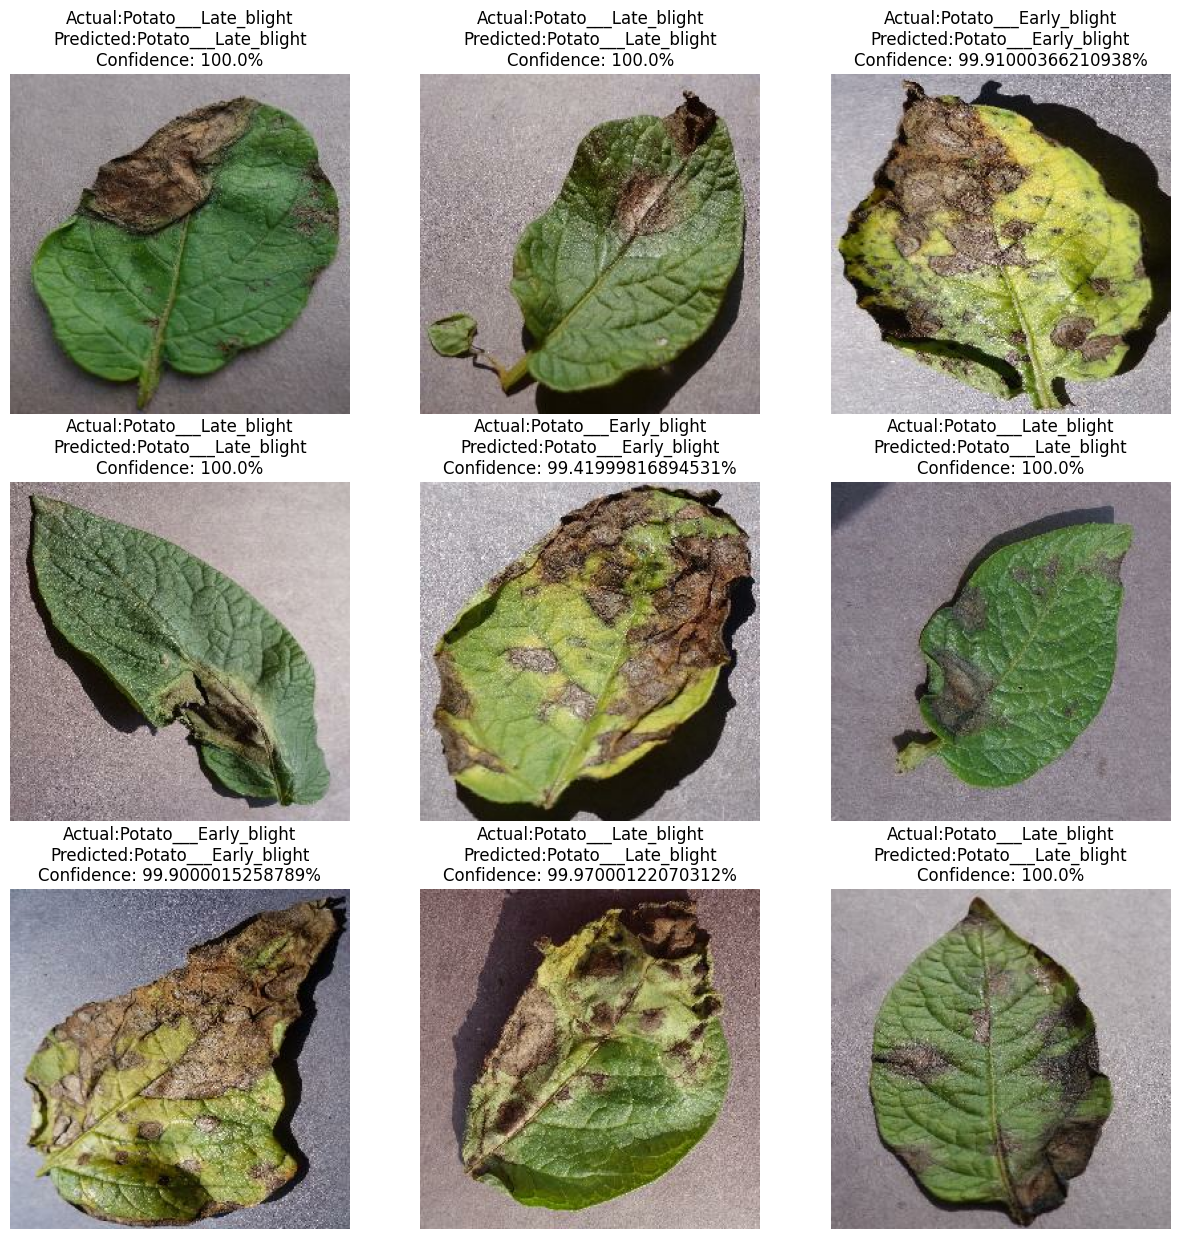

In [44]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        predicted_class,confidence=predict(model,images[i].numpy())
        plt.title(f'Actual:{class_names_[labels[i]]}\nPredicted:{predicted_class}\nConfidence: {confidence}%')
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.axis('off')


In [45]:
model_version=1
model.save(f"../model/{model_version}.keras")

In [46]:
model.save(f"../model/{model_version}.h5")

In [47]:
import os
model_version=max([int(i) for i in os.listdir("../model") + [0]])+1
model.save(f"../model/{model_version}.h5")

ValueError: invalid literal for int() with base 10: '1.h5'

In [ ]:
model.save("../potatoes.h5")